# Exercise 4B - Comparing Weighted Sum and Pareto Fronts approaches
Introduced during Tutorial 4

In exercise 4A we will begin by using a <span style="color:orange;"> synthetic dataset generated by two objective functions </span>. 

From this dataset, we will compare the results using the weighted sum method and the pareto front method.

### Colour codes

<span style="color:orange;"> Orange text is for emphasis and definitions </span>

<span style="color:lime;"> Green text is for tasks to be completed by the student </span>

<span style="color:dodgerblue;"> Blue text is for Python coding tricks and references </span>

## Load all of the necessary Python packages
All packages should work with Conda environment if installed on your machine. Otherwise all necessary packages can be installed in a virtual environment (.venv) in VS Code using: Ctrl+Shift+P > Python: Create Environment > Venv > Python 3.12.x > requirements.txt

<span style="color:orange;"> NOTE: that we are using the paretoset package will be used. You may need to install this package using pip.</span>

In [1]:
import itertools
import matplotlib.pyplot as plt
from matplotlib import colormaps

import numpy as np
import pandas as pd
from paretoset import paretoset


## 1. Creating a synthetic dataset
We will create a two-dimensional dataset (x<sub>1</sub> and x<sub>2</sub>) and define two objective functions (J<sub>1</sub> and J<sub>2</sub>) which complex mathematical expressions.

### 1.1 Objective Functions
First, let's define the two objective functions:

In [2]:
def objectiveFunction_1(x_1, x_2):
    return 3 * (1 - x_1) ** 2 * np.exp(-x_1 ** 2 - (x_2 + 1)**2) - 10 * (x_1 / 5 - x_1 ** 3 - x_2 ** 5) * np.exp(-(x_1) ** 2 - (x_2 **2)) - 3 * np.exp (-( x_1 + 2)**2 - x_2 **2) + 0.5 * (x_1 + x_2)

def objectiveFunction_2(x_1, x_2):
    return 2 * (1 + x_2) ** 2 * np.exp((-x_2 ** 2) - (x_1)**2) - 10 * (-x_2 / 5 + x_2 ** 3  + x_1 ** 5) * np.exp(-(x_2 ** 2) - (x_1) **2) - 2 * np.exp (- (2 - x_2)**2 - x_1 **2)
   

### 1.2 Generate the vectors (x<sub>1</sub> and x<sub>2</sub>) for the two-dimensional solution space. 

* These will be discretized into *n* intervals using the linspace function. 
    * The constraints for this function are [-3, 3]
* We will then create a <span style="color:orange;"> full-factorial </span> two-dimensional array of all combinations of x<sub>1</sub> and x<sub>2</sub>. The objective functions will be evaluated at these points.
    * We will discuss the definition of <span style="color:orange;"> full-factorial </span> in Lectures 6 and 7.
* Then we will store the combinations into a Pandas dataframe to easier tracking when plotting and performing the Pareto Analysis.


In [3]:
n_intervals = 25
x1 = np.linspace(-3, 3, n_intervals)
x2 = np.linspace(3, -3, n_intervals) # NOTE: This is reversed to make plotting with Matplotlib easier

# Generate a full-factorial two-dimensional array of all combinations of x_1 and x_2
combinations = np.array(list(itertools.product(x1, x2)))

# Place these unique coordinates into the dataframe
df = pd.DataFrame()

df["x1"] = combinations[:, 0]
df["x2"] = combinations[:, 1]

print (f"{df.shape[0]} unique coordinates have been created.")


625 unique coordinates have been created.


* We will now generate a plot to confirm the grid.
    * <span style="color:dodgerblue;"> NOTE you can typeset the labels in matplotlib as done in ax.set_xlabel(). This is done using rawstrings (the leading r) which can create subscripts, superscripts, Greek characters and other mathematical characters. https://matplotlib.org/stable/users/explain/text/mathtext.html. This is a way to improve the quality of your visualisations in Python. <span>

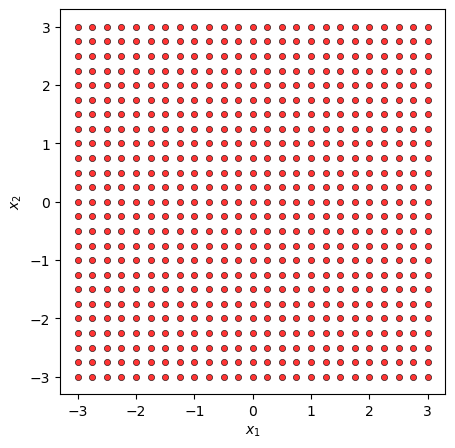

In [4]:
fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, s = 20, c = "red", alpha = 0.8, linewidths = 0.5, edgecolors = "black")

ax.set_aspect("equal", "box") # Ensure the grid is square

ax.set_xlabel (r'$x_1$') # See NOTE
ax.set_ylabel (r'$x_2$')

fig.set_figheight(5)

plt.show()

### 1.3 Calculate the value of each objective function at each of the coordinates.

In [5]:
# Calculate the values of the objective functions
df["J1"] = objectiveFunction_1 (df["x1"], df["x2"])
df["J2"] = objectiveFunction_2 (df["x1"], df["x2"])

print ("The first few rows of the dataframe:")
print (df.head())

The first few rows of the dataframe:
    x1    x2        J1        J2
0 -3.0  3.00 -0.000103 -0.000057
1 -3.0  2.75 -0.125489  0.000004
2 -3.0  2.50 -0.251961  0.000356
3 -3.0  2.25 -0.381741  0.001597
4 -3.0  2.00 -0.520087  0.005115


### 1.4 Visualization

Plot the resultant objective functions with a heat map. This is done using a Matplotlib function called *pcolormesh()*.

* <span style="color:dodgerblue;"> NOTE: You can choose the colours used in the colourbars from a list of options [ColorMaps Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html). The choice of colour can be important for accessibility and readability reasons. Here I chose red and blue because intuitively red means hot/high and blue means cold/low and white is neutral. <span>

* <span style="color:limegreen;"> What do you notice about the two objective functions when viewed side-by-side? <span>

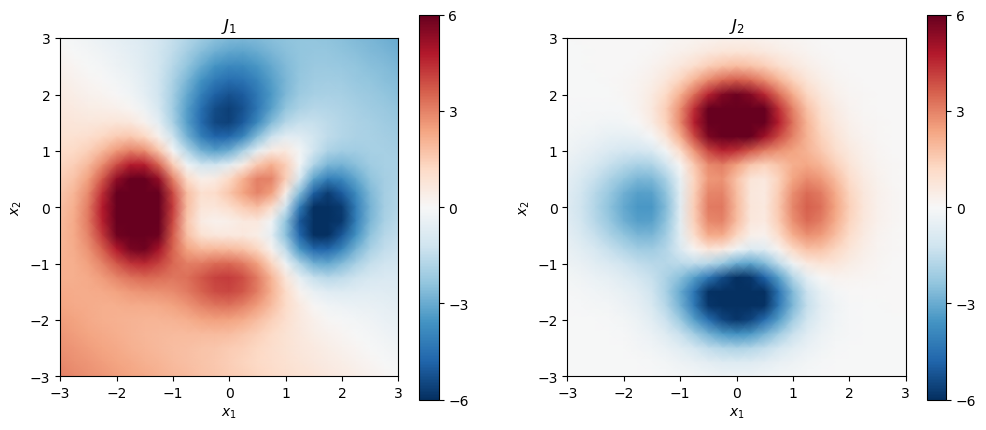

In [6]:
# Choose a colour map to be used
cmap = "RdBu_r" # Red and blue colour bar. The'_r" denotes that it is reversed so blue is for lower (colder) values than red

# Create two plots in the same figure side-by-side
fig, ax = plt.subplots(ncols = 2) 

Figure_1 = ax[0].pcolormesh(x1, x2, np.reshape (df.J1, (n_intervals, n_intervals)), cmap = cmap, shading='gouraud', vmin = -6, vmax = 6)
ax[0].set_aspect("equal", "box")
ax[0].set_xlabel (r'$x_1$')
ax[0].set_ylabel (r'$x_2$')
ax[0].set_title (r'$J_1$')

Figure_2 = ax[1].pcolormesh(x1, x2, np.reshape (df.J2, (n_intervals, n_intervals)), cmap = cmap, shading='gouraud', vmin = -6, vmax = 6)
ax[1].set_aspect("equal", "box")
ax[1].set_xlabel (r'$x_1$')
ax[1].set_ylabel (r'$x_2$')
ax[1].set_title (r'$J_2$')

fig.set_figwidth(12)
fig.set_figheight(5)

# Create a colourbar to the right of both figures
plt.colorbar(Figure_1, ticks = [-6, -3, 0, 3, 6])
plt.colorbar(Figure_2, ticks = [-6, -3, 0, 3, 6])

plt.show()

## 2 Multi-objective Analysis

* Visually what can we determine about the minima and maxima of each objective function?

* Where are their approximate locations?

### 2.1 Weighted-sum Method

What if we summed J<sub>1</sub> and J<sub>2</sub> together? (assuming they are weighted equally). 

What will happen to the maxima and minima?

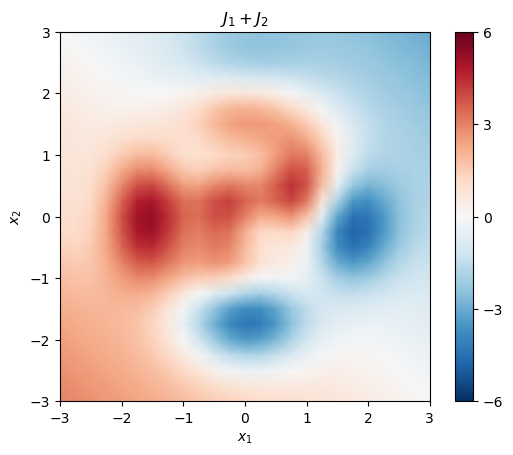

In [7]:
# Create a plot where J_1 and J_2 are summed together.
fig, ax = plt.subplots()

Figure_1 = ax.pcolormesh(x1, x2, np.reshape(df.J1 + df.J2, (n_intervals, n_intervals)), cmap = cmap, shading='gouraud', vmin = -6, vmax = 6)

ax.set_aspect("equal", "box")
ax.set_xlabel (r'$x_1$')
ax.set_ylabel (r'$x_2$')
ax.set_title (r'$J_1 + J_2$')

# Create a colourbar to the right of the figure
plt.colorbar(Figure_1, ticks = [-6, -3, 0, 3, 6])

plt.show()

<span style="color:limegreen"> Note how the minima and maxima of the combined objective function may have changed. The locations of the global minima and maxima is more ambiguous and regions which may not have been considered a minima or maxima become plausible solutions. </span>

Is it possible to determine the global minima and maxima from this graph?

### 2.2 Locating the Minima and Maxima

In this step, we will quantify the locations of the global minima/maxima of J<sub>1</sub> and J<sub>2</sub> and the minima/maxima using the weighted sum method.

We can find the index of the minimum and maximum using Panda's idxmin and idxmax function

In [9]:
# Find the index of the max and min of J_1 and J_2 and mark them on the plot
min_J1 = df.J1.idxmin()
max_J1 = df.J1.idxmax()
min_J2 = df.J2.idxmin()
max_J2 = df.J2.idxmax()

min_sum = (df.J1 + df.J2).idxmin()
max_sum = (df.J1 + df.J2).idxmax()

print ("J_1")
print (f"Min coordinates = {df.loc[min_J1, "x1"]}, {df.loc[min_J1, "x2"]}. Min value = {df.loc[min_J1, "J1"]:.4f}")
print (f"Max coordinates = {df.loc[max_J1, "x1"]}, {df.loc[max_J1, "x2"]}. Max value = {df.loc[max_J1, "J1"]:.4f}")
print ("J_2")
print (f"Min coordinates = {df.loc[min_J2, "x1"]}, {df.loc[min_J2, "x2"]}. Min value = {df.loc[min_J2, "J1"]:.4f}")
print (f"Max coordinates = {df.loc[max_J2, "x1"]}, {df.loc[max_J2, "x2"]}. Max value = {df.loc[max_J2, "J1"]:.4f}")
print ("Weighted Sum")
print (f"Min coordinates = {df.loc[min_sum, "x1"]}, {df.loc[min_sum, "x2"]}. Min value = {df.loc[min_sum, "J1"]:.4f}")
print (f"Max coordinates = {df.loc[max_sum, "x1"]}, {df.loc[max_sum, "x2"]}. Max value = {df.loc[max_sum, "J1"]:.4f}")


SyntaxError: f-string: unmatched '[' (2722327512.py, line 11)

Plot the maximum and minimum points
* Use round 'o' markers for objective function J<sub>1</sub>
* Use diamond 'd' markers for objective function J<sub>2</sub>
* Use star markers '*' for the weighted sum

In [ ]:
fig, ax = plt.subplots()

Figure_1 = ax.pcolormesh(x1, x2, np.reshape(df.J1 + df.J2, (n_intervals, n_intervals)), cmap = cmap, shading='gouraud', vmin = -6, vmax = 6)


ax.scatter(df.loc[min_J1, "x1"], df.loc[min_J1, "x2"], s = 75, c = "darkblue", alpha = 0.8, linewidths = 0.5, edgecolors = "white", marker = 'o', label = r"min $J_1$")
ax.scatter(df.loc[max_J1, "x1"], df.loc[max_J1, "x2"], s = 75, c = "darkred", alpha = 0.8, linewidths = 0.5, edgecolors = "white", marker = 'o', label = r"max $J_1$")

ax.scatter(df.loc[min_J2, "x1"], df.loc[min_J2, "x2"], s = 75, c = "darkblue", alpha = 0.8, linewidths = 0.5, edgecolors = "white", marker = 'd', label = r"min $J_2$")
ax.scatter(df.loc[max_J2, "x1"], df.loc[max_J2, "x2"], s = 75, c = "darkred", alpha = 0.8, linewidths = 0.5, edgecolors = "white", marker = 'd', label = r"max $J_2$")

ax.scatter(df.loc[min_sum, "x1"], df.loc[min_sum, "x2"], s = 60, c = "darkblue", alpha = 0.8, linewidths = 0.5, edgecolors = "white", marker = '*', label = r"min weighted sum")
ax.scatter(df.loc[max_sum, "x1"], df.loc[max_sum, "x2"], s = 60, c = "darkred", alpha = 0.8, linewidths = 0.5, edgecolors = "white", marker = '*', label = r"max weighted sum")

ax.set_aspect("equal", "box")
ax.set_xlabel (r'$x_1$')
ax.set_ylabel (r'$x_2$')
ax.set_title (r'$J_1 + J_2$')

# Create a colourbar to the right of the figure
plt.colorbar(Figure_1, ticks = [-6, -3, 0, 3, 6])

plt.show()


<span style="color:limegreen;">What do you notice about the minima and maxima of the weighted sum example?</span>

## 3 Pareto Plots
In this section we will determine the Pareto Front of both objective functions and determine where the regions of interest are.

### 3.1 Mapping Data Points
To aid visualisation, the domain will be visually mapped onto a plot of J<sub>1</sub> and J<sub>2</sub> by varying the colour an transparency of each data point.

To do this, we need to first create different colors and alpha for each data point. This step uses some Pandas trickery (np.tile() and np.repeat()) and can be tricky to follow.

<span style="color:orange;"> This is step is not core to the learning objectives of this exercise. It is OK to not follow this step </span>

In [ ]:
# Choose a different color map
cmap2 = "inferno"

# Get the 256 different RGB colours which constitute the colormap
colourMap = colormaps[cmap2].colors

# Add the colour and alpha information to the dataframe

# Generate the indices of the colourmap to be used for each point
# Colours will appear to change row-by-row
colourMapIndices = np.tile(np.linspace(0, 255, n_intervals), n_intervals).astype(int).tolist()

# Add the RGB colour of that index for each data point
df["colour"] = [colourMap[x] for x in colourMapIndices]

# Generate an array of alphas for each point
# Alpha will appear to fade column by column.
df["alpha"] = np.linspace(0.25, 1, n_intervals).repeat(n_intervals)

print ("The first few rows of the dataframe now have color information:")
print (df.head())


### 3.2 Plot the Domain to the Objective Functions
Use Matplotlib's scatter plot function with colour and alpha information for each point given. The graph on the right are the values of the objective functions.

In [ ]:
# Plot the grid on the left
fig, ax = plt.subplots(ncols = 2)
ax[0].scatter(df.x1, df.x2, s = 15, c = df.colour, alpha = df.alpha, linewidths = 0.5, edgecolors = "black")
ax[0].set_aspect("equal", "box")
ax[0].set_xlabel (r'$x_1$')
ax[0].set_ylabel (r'$x_2$')

# Plot the scatterplot of the objective functions on the right
ax[1].scatter(df.J1, df.J2, s = 15, c = df.colour, alpha = df.alpha, linewidths = 0.5, edgecolors = "black")
ax[1].set_aspect("equal", "box")
ax[1].set_xlabel (r'$J_1$')
ax[1].set_ylabel (r'$J_2$')

fig.set_figwidth(12)
fig.set_figheight(5)
plt.show()

**<span style="color:limegreen;">Test your Understanding</span>**
* <span style="color:limegreen;"> Can you visualise the Pareto Front on both the min-min and max-max sides? </span>
* <span style="color:limegreen;"> Are they different in character to the 7-point example done by hand and those in Example 4A? </span>
* <span style="color:limegreen;"> Can you identify which regions of the domain produce the optimal solutions? </span>

### 3.3 Pareto Front Analysis (max-max)
To do the pareto front analysis we will use a package called *paretoset* [Link](https://pypi.org/project/paretoset/).

First we will do an analysis to find the maximum of both functions (sense = "max").


In [ ]:
# Identify the max-max Pareto Front points
column1 = "J1"
column2 = "J2"
paretoFront_max = paretoset(df[[column1, column2]], sense = ["max", "max"])

# The function returns an array of booleans whether that index is on the Pareto Front or not.
print (f"{paretoFront_max.sum()} of {df.shape[0]} points identified on max - max Pareto front")

The paretoset function generates a list of boolean (True or False) values which can be used as a *mask* in later steps.

In [ ]:
print (paretoFront_max)

### 3.3.1 Visualisation
Recreate the previous plot with Pareto points emphasized in lime green

In [ ]:
# Create separate dataframes for those on the Pareto Front and those which are not.
# Those on the Pareto Front will be plotted separately with colour emphasized
onPareto = df[paretoFront_max]

offPareto = df[~paretoFront_max] # Note the tilde denotes 'not' 

# Plot the graph
fig, ax = plt.subplots(ncols = 2)
# First the points off of the Pareto front
ax[0].scatter(offPareto.x1, offPareto.x2, s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
# Second those on the Pareto Front with colour green for emphasis
ax[0].scatter(onPareto.x1, onPareto.x2, s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")

ax[0].set_aspect("equal", "box")
ax[0].set_xlabel (r'$x_1$')
ax[0].set_ylabel (r'$x_2$')

ax[1].scatter(offPareto[column1], offPareto[column2], s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
ax[1].scatter(onPareto[column1], onPareto[column2], s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")

ax[1].set_aspect("equal", "box")
ax[1].set_xlabel (r'$J_1$')
ax[1].set_ylabel (r'$J_2$')

fig.set_figwidth(12)
fig.set_figheight(5)

plt.show()


**<span style="color:limegreen;">Test your Understanding</span>**
* <span style="color:limegreen;">Notice how many distinct regions there are. Does this correlate to the heat map in Section 2.1 using the Weighted Sum Method?</span>

### 3.4 Pareto Front Analysis (min-min)
Repeat the process to find the min-min Pareto Front

In [ ]:
# Identify the min-min Pareto Front points
column1 = "J1"
column2 = "J2"
paretoFront_min = paretoset(df[["J1", "J2"]], sense = ["min", "min"])

# The function returns an array of booleans whether that index is on the Pareto Front or not.
print (f"{paretoFront_min.sum()} of {df.shape[0]} points identified on min - min Pareto front")

In [ ]:
# Create separate dataframes for those on the Pareto Front and those which are not.
# Those on the Pareto Front will be plotted separately with colour emphasized
onPareto = df[paretoFront_min]

offPareto = df[~paretoFront_min] # Note the tilde denotes 'not' 

# Plot the graph
# First the points off of the Pareto front
fig, ax = plt.subplots(ncols = 2)
ax[0].scatter(offPareto.x1, offPareto.x2, s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
# Second those on the Pareto Front with colour green for emphasis
ax[0].scatter(onPareto.x1, onPareto.x2, s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")

ax[0].set_aspect("equal", "box")
ax[0].set_xlabel (r'$x_1$')
ax[0].set_ylabel (r'$x_2$')

ax[1].scatter(offPareto[column1], offPareto[column2], s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
ax[1].scatter(onPareto[column1], onPareto[column2], s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")
ax[1].set_aspect("equal", "box")
ax[1].set_xlabel (r'$J_1$')
ax[1].set_ylabel (r'$J_2$')

fig.set_figwidth(12)
fig.set_figheight(5)

plt.show()


**<span style="color:limegreen;">Test your Understanding</span>**
* <span style="color:limegreen;">Notice that there are three distinct regions for the minimum pareto front (There is a a highlighted point at (-3, -3)). Does this correlate to the heat map in Section 2.1 using the Weighted Sum Method?</span>
* <span style="color:limegreen;">Can you explain why this third region with solitary point might be significant. Think about one of the topics we discussed in Lecture 3.</span>

### 3.5 Comparison to the Weighted Sum Method

To help understand how the weighted sum method compares to the Pareto Front method we will expand the work we did in Section 2.1 to include more possible weightings of J<sub>1</sub> and J<sub>2</sub>.

In section 2.1 we assumed that both J<sub>1</sub> and J<sub>2</sub> had equal weighting. In this example we will vary the weightings in 0.05 intervals

In [ ]:
# Create a list of the min and max indices
idx_min = []
idx_max = []

# Iterate through all possible combinations of w_1 and w_2 at intervals of 0.05
weightedSumIntervals = 20
for i in range(weightedSumIntervals + 1):
    # Calculate the weights of each
    w_1 = i /weightedSumIntervals
    w_2 = 1 - w_1

    J_total = w_1 * df.J1 + w_2 * df.J2

    # Find the index of the minimum and maximum from J_total
    idx_min.append(J_total.idxmin())
    idx_max.append(J_total.idxmax())

# NOTE Python can be very useful when trying to find unique values and performing set operations like union and intersection.
weightedSum_idx_min = list(set(idx_min))
weightedSum_idx_max = list(set(idx_max))

print (f"{len(weightedSum_idx_min)} points, indices {weightedSum_idx_min}, were found for the minimum front using the weighted sum method.")
print (f"{len(weightedSum_idx_max)} points, indices {weightedSum_idx_max}, were found for the maximum front using the weighted sum method.")


Notice that the weighted sum identified far fewer points of interest than the pareto front analysis. Increasing the number of weighted sum intervals checked should not have a significant effect on the number of points of interest discovered.

This is largely because of the <span style="color:orange;">concavity/convexity </span> of the pareto front on both sides. They don't make a clean arc.

#### 3.5.1 Max-max problem
Re-using the previous max-max plot from 3.1, we can see the locations of the weighted sum method highlighted in blue:

In [ ]:
# Create separate dataframes for those on the Pareto Front and those which are not.
# Those on the Pareto Front will be plotted separately with colour emphasized
onPareto = df[paretoFront_max]

offPareto = df[~paretoFront_max] # Note the tilde denotes 'not' 

# Also make a dataframe for the weighted sum method
weightedSum = df.loc[weightedSum_idx_max]

# Plot the graph
# First the points off of the Pareto front
fig, ax = plt.subplots(ncols = 2)
ax[0].scatter(offPareto.x1, offPareto.x2, s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
# Second those on the Pareto Front with colour green for emphasis
ax[0].scatter(onPareto.x1, onPareto.x2, s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")
# Third those on the Pareto Front with colour green for emphasis
ax[0].scatter(weightedSum.x1, weightedSum.x2, s = 30, c = "deepskyblue", alpha = 1.0, linewidths = 0.5, edgecolors = "black", marker = "s")

ax[0].set_aspect("equal", "box")
ax[0].set_xlabel (r'$x_1$')
ax[0].set_ylabel (r'$x_2$')

ax[1].scatter(offPareto[column1], offPareto[column2], s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
ax[1].scatter(onPareto[column1], onPareto[column2], s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")
ax[1].scatter(weightedSum[column1], weightedSum[column2], s = 30, c = "deepskyblue", alpha = 1.0, linewidths = 0.5, edgecolors = "black", marker = "s")

ax[1].set_aspect("equal", "box")
ax[1].set_xlabel (r'$J_1$')
ax[1].set_ylabel (r'$J_2$')

fig.set_figwidth(12)
fig.set_figheight(5)

plt.show()

#### 3.5.1 Min-min problem

In [ ]:
# Create separate dataframes for those on the Pareto Front and those which are not.
# Those on the Pareto Front will be plotted separately with colour emphasized
onPareto = df[paretoFront_min]

offPareto = df[~paretoFront_min] # Note the tilde denotes 'not' 

weightedSum = df.loc[weightedSum_idx_min]

# Plot the graph
# First the points off of the Pareto front
fig, ax = plt.subplots(ncols = 2)
ax[0].scatter(offPareto.x1, offPareto.x2, s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
# Second those on the Pareto Front with colour green for emphasis
ax[0].scatter(onPareto.x1, onPareto.x2, s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")
# Third those on the Pareto Front with colour green for emphasis
ax[0].scatter(weightedSum.x1, weightedSum.x2, s = 30, c = "deepskyblue", alpha = 1.0, linewidths = 0.5, edgecolors = "black", marker = "s")

ax[0].set_aspect("equal", "box")
ax[0].set_xlabel (r'$x_1$')
ax[0].set_ylabel (r'$x_2$')

ax[1].scatter(offPareto[column1], offPareto[column2], s = 15, c = offPareto.colour, alpha = offPareto.alpha, linewidths = 0.5, edgecolors = "black")
ax[1].scatter(onPareto[column1], onPareto[column2], s = 30, c = "lime", alpha = 1.0, linewidths = 0.5, edgecolors = "black")
ax[1].scatter(weightedSum[column1], weightedSum[column2], s = 30, c = "deepskyblue", alpha = 1.0, linewidths = 0.5, edgecolors = "black", marker = "s")

ax[1].set_aspect("equal", "box")
ax[1].set_xlabel (r'$J_1$')
ax[1].set_ylabel (r'$J_2$')

fig.set_figwidth(12)
fig.set_figheight(5)

plt.show()

**<span style="color:limegreen;">Test your Understanding</span>**
* <span style="color:limegreen"> What do you notice about the points the weighted sum method found and the ones it did not find but the pareto fronts did? </span>
* <span style="color:limegreen"> Mathematically, can you explain why the weighted sum method struggles to find the concave regions on the min-min pareto front? </span>

## 4. Food for thought
The following are questions which you can think about independently on your own time. They are to prompt critical thinking which can help reinforce your understanding of the lecture material, and could help improve the quality of your coursework.

* <span style="color:limegreen;"> What would happen to the Pareto plots if we increased the number of intervals from 25 per row/column? </span>
* <span style="color:limegreen;"> What would happen if we removed the constraints of [-3, 3] from the problem? </span>
* <span style="color:limegreen;"> Can you think of alternative methods for visualising the Pareto front's regions of interest in terms of x<sub>1</sub> and x<sub>2</sub>? </span>
* <span style="color:limegreen;"> Without the aid of visualisation, how would you express what the optimal solution(s) of our example are? </span>

</span>